In [58]:
import pandas as pd
import sklearn
from matplotlib import pyplot as plt

In [59]:
df = pd.read_csv('shoe.csv')

In [60]:
df.head()

,size(cm),class(y)
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male


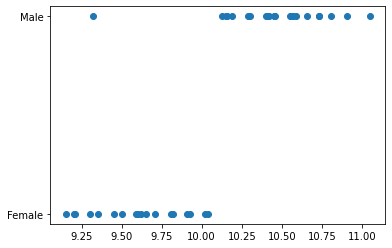

In [61]:
plt.scatter(df['size(cm)'], df['class(y)'])

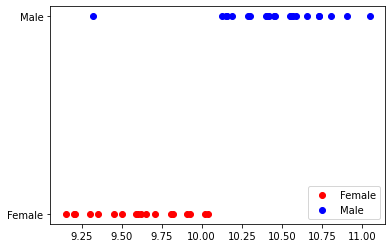

In [62]:
df0 = df[df['class(y)'] == 'Female']
df1 = df[df['class(y)'] == 'Male']

plt.scatter(df0['size(cm)'], df0['class(y)'], color='red', label='Female')
plt.scatter(df1['size(cm)'], df1['class(y)'], color='blue', label='Male')

plt.legend()


In [63]:
#preprocessing
df['class(y)'] = df['class(y)'].replace(['Male', 'Female'], [1,0])

In [64]:
df.head()

,size(cm),class(y)
0,9.500,0
1,10.125,1
2,10.410,1
3,9.810,0
4,11.050,1


In [65]:
from sklearn.model_selection import train_test_split

In [66]:
xtrain,xtest,ytrain,ytest = train_test_split(df[['size(cm)']], df['class(y)'], test_size=.30)

In [67]:
xtrain.head()

,size(cm)
10,9.82
2,10.41
32,10.40
11,10.42
8,9.71


In [68]:
ytrain.head()

10    0
2     1
32    1
11    1
8     0
Name: class(y), dtype: int64

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
reg = LogisticRegression()

In [71]:
reg.fit(xtrain, ytrain)

LogisticRegression()

In [72]:
reg.coef_

array([[2.04822478]])

In [73]:
reg.intercept_

array([-19.8877912])

In [74]:
reg.predict_proba(xtest)

array([[0.12495901, 0.87504099],
       [0.55597274, 0.44402726],
       [0.39888421, 0.60111579],
       [0.44885602, 0.55114398],
       [0.56102316, 0.43897684],
       [0.69831792, 0.30168208],
       [0.7396448 , 0.2603552 ],
       [0.33706847, 0.66293153],
       [0.11010581, 0.88989419],
       [0.15174494, 0.84825506],
       [0.62996508, 0.37003492],
       [0.54583813, 0.45416187]])

In [75]:
reg.predict(xtest)

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

In [76]:
ytest

23    1
38    0
31    0
3     0
33    0
35    0
22    0
30    0
29    1
14    1
6     0
24    0
Name: class(y), dtype: int64

In [77]:
logit = reg.score(xtest, ytest)
logit

0.75

In [78]:
#KNN Classifier

In [79]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)

In [80]:
neigh.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=1)

In [81]:
neigh.predict(xtest)

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [82]:
ytest

23    1
38    0
31    0
3     0
33    0
35    0
22    0
30    0
29    1
14    1
6     0
24    0
Name: class(y), dtype: int64

In [83]:
KNN = neigh.score(xtest, ytest)
KNN

0.9166666666666666

In [84]:
# Make Visualization for KNN & Logistic Reg like-

In [89]:
data={
    'Algorithm_name': ['Logistic Regression', 'KNN Classifier'],
    'Accuracy': [logit, KNN],
}
ds = pd.DataFrame(data)
ds

,Algorithm_name,Accuracy
0,Logistic Regression,0.750000
1,KNN Classifier,0.916667


In [99]:
ds.nlargest(1,'Accuracy')

,Algorithm_name,Accuracy
1,KNN Classifier,0.916667


In [91]:
import seaborn as sns
sns.set(color_codes=True)
from seaborn import barplot

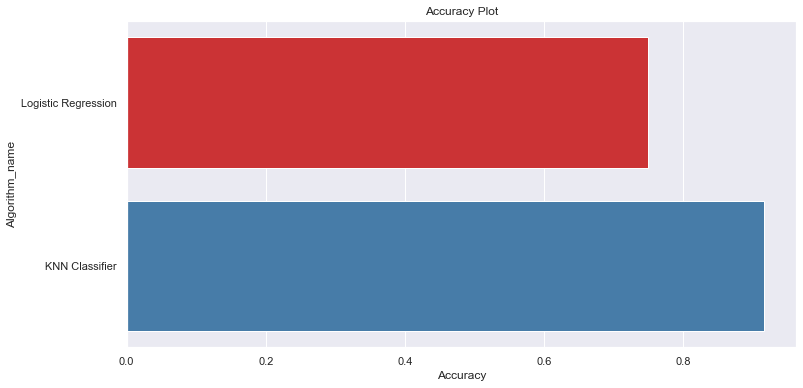

In [112]:
sns.set()
sns.barplot(y='Algorithm_name', x='Accuracy', data=ds, palette="Set1").set(title='Accuracy Plot')
sns.set(rc={'figure.figsize':(12,6)})